# One component Plasma

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'coulomb_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## PreProcessing

In [2]:
# preproc = PreProcess(input_file_name)
# preproc.setup(read_yaml=True)
# preproc.run(pppm_estimate = True, remove = True)

In [3]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics suite for non-ideal plasmas.


--------------------------- Production Restart -------------------------------------
Time step = 1.193536e-17 [s]
Total plasma frequency = 1.675504e+15 [Hz]
w_p dt = 0.0200
Restart step: 50000
Total production steps = 100000 
Total production time = 1.1935e-12 [s] ~ 1999 w_p T_prod 
snapshot interval step = 5 
snapshot interval time = 5.9677e-17 [s] = 0.1000 w_p T_snap


------------------------ Initialization Times ------------------------ 


Potential Initialization Time: 0 hrs 0 min 13 sec

Particles Initialization Time: 0 sec 3 msec 480 usec 599 nsec

Total Simulation Initialization Time: 0 hrs 0 min 13 sec

------------- Produ

  0%|          | 0/50000 [00:00<?, ?it/s]


Production Time: 4 hrs 33 min 16 sec

Total Time: 4 hrs 33 min 16 sec




--------------------------- Production Restart -------------------------------------
Time step = 1.193536e-17 [s]
Total plasma frequency = 1.675504e+15 [Hz]
w_p dt = 0.0200
Restart step: 50000
Total production steps = 100000 
Total production time = 1.1935e-12 [s] ~ 1999 w_p T_prod 
snapshot interval step = 5 
snapshot interval time = 5.9677e-17 [s] = 0.1000 w_p T_snap


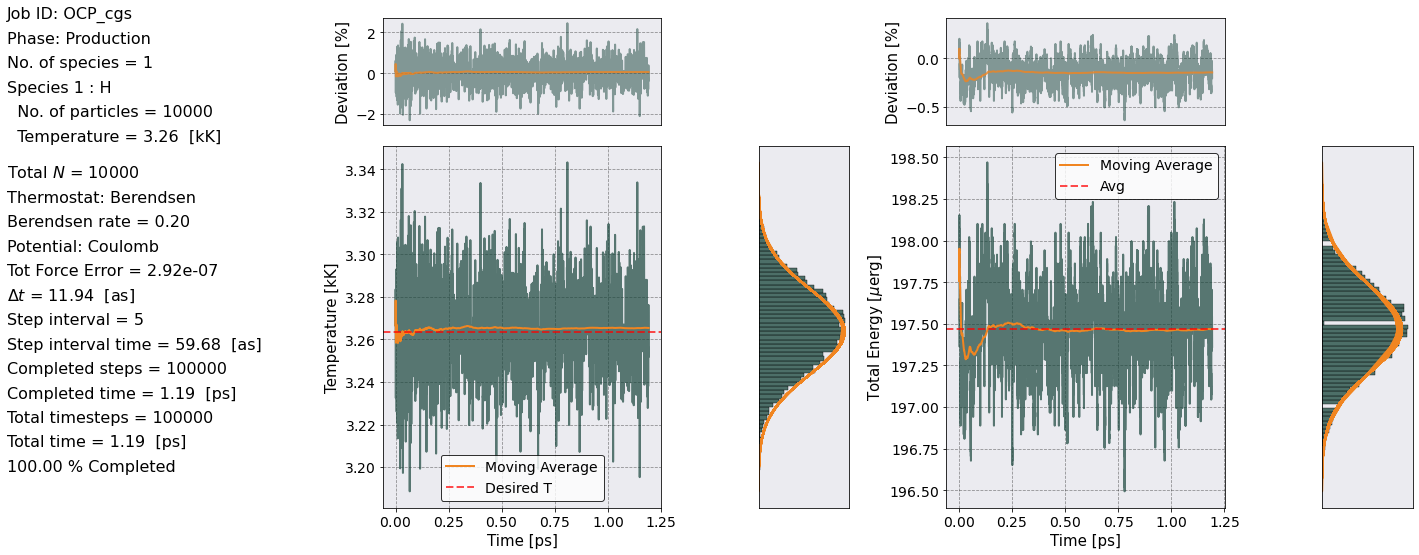

In [4]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc)

In [5]:
# from sarkas.tools.observables import PressureTensor

# pt = PressureTensor()
# pt.setup(postproc.parameters)
# pt.compute()

In [6]:
# beta = pt.kB * postproc.therm.dataframe["Temperature"].mean() * pt.total_num_density
# ax = pt.plot(scaling = (1e-15, beta), y = [("Pressure", "Mean")], xlabel = 'Time [fs]', ylabel = 'Pressure')
# ax.legend()

In [7]:
# pt.dataframe[("Pressure","Mean")].mean()/beta

In [8]:
# postproc.rdf.setup(postproc.parameters)
# postproc.rdf.compute()

In [9]:
# rdf = np.copy(postproc.rdf.dataframe["H-H RDF"].to_numpy())
# r = np.copy(postproc.rdf.dataframe["Distance"].to_numpy())

# postproc.therm.compute_pressure_from_rdf(r, rdf, 'Coulomb', postproc.potential.matrix)/beta

In [10]:
# postproc.rdf.plot(scaling = postproc.rdf.a_ws, xlabel = r'$r/a_{\rm ws}$')

In [11]:
from sarkas.tools.transport import TransportCoefficient


# eta = TransportCoefficient.viscosity(postproc.parameters, compute_acf=False)



======================= Viscosity Coefficient ======================== 


Calculating pressure tensor and its acf for slice 1/1.


Calculating Pressure:   0%|          | 0/20001 [00:00<?, ?it/s]


Pressure Tensor and its ACF Calculation Time: 0 hrs 0 min 39 sec
Data saved in: 
 Simulations/OCP_cgs/PostProcessing/PressureTensor/Production/Viscosities_OCP_cgs.h5

No. of slices = 1
No. dumps per slice = 4000
Time interval of autocorrelation function = 2.3872e-13 [s] ~ 399 w_p T


  0%|          | 0/1 [00:00<?, ?it/s]

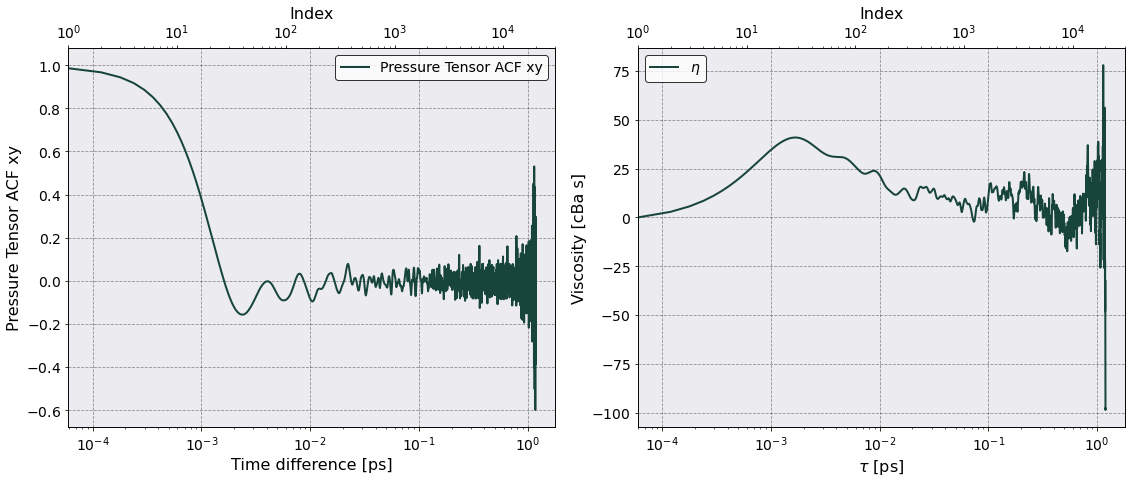

In [29]:
eta = TransportCoefficient.viscosity(postproc.parameters, 
                                     compute_acf=True,
                                     no_slices = 1,
                                    plot_quantities=['Shear Viscosity Tensor xy'])

(0.0, 1.0)

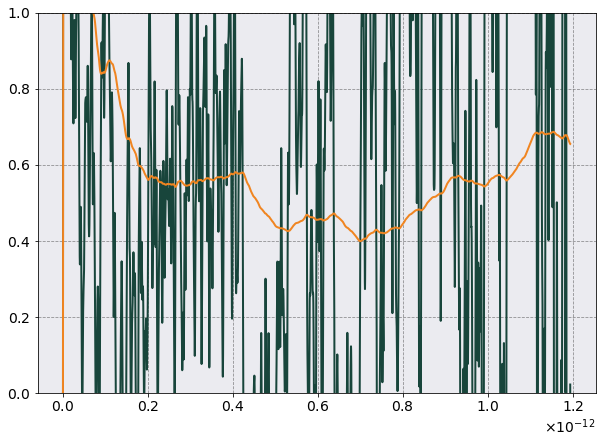

In [30]:
norms = postproc.parameters.species_masses[0]*postproc.parameters.total_num_density*postproc.parameters.total_plasma_frequency*postproc.parameters.a_ws**2
plt.plot(eta['Time'], 
         eta[('Shear Viscosity Tensor yz', 'Mean')]/norms)

plt.plot(eta['Time'], 
         eta[('Shear Viscosity Tensor yz', 'Mean')].expanding().mean()/norms)
plt.ylim(0,1)

In [25]:
norm

<function numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)>



======================= Diffusion Coefficient ======================== 


Calculating vacf for slice 1/1.


Read in data:   0%|          | 0/20001 [00:00<?, ?it/s]


VACF Calculation Time: 0 hrs 1 min 53 sec
Data saved in: 
 Simulations/OCP_cgs/PostProcessing/VelocityAutoCorrelationFunction/Production/Diffusion_OCP_cgs.h5

No. of slices = 1
No. dumps per slice = 4000
Time interval of autocorrelation function = 2.3872e-13 [s] ~ 399 w_p T


  0%|          | 0/1 [00:00<?, ?it/s]

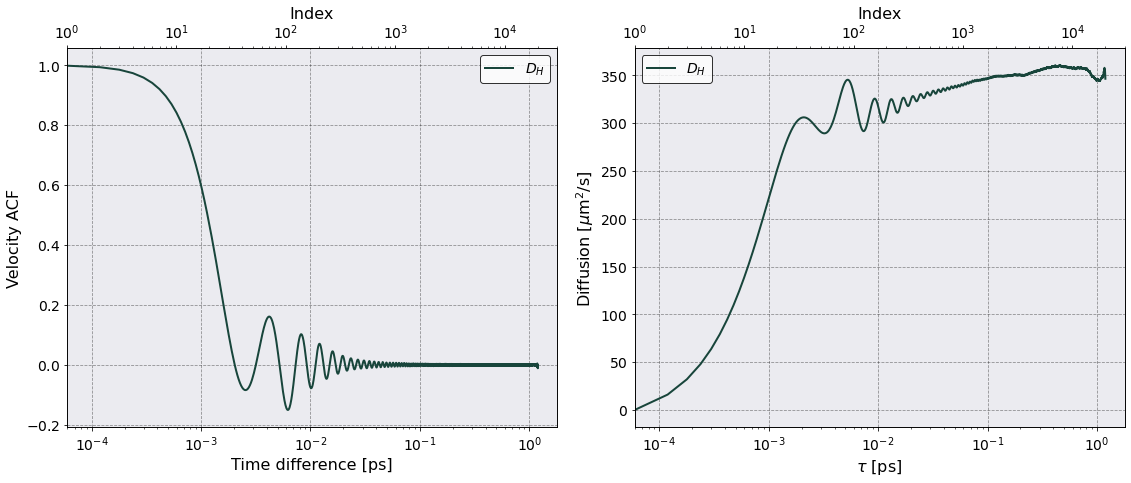

In [13]:
diffusion = TransportCoefficient.diffusion(postproc.parameters)